In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.metrics as sm

In [2]:
dataset = pd.read_csv('wrapper_63.csv')
X= dataset.drop(['label'], axis=1)   # 取出用于建模的特征列X
Y = dataset['label']   # 取出标签列Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=420)

In [3]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
classifier = AdaBoostClassifier(random_state = 420)

In [18]:
param_grid=[{
            'algorithm':['SAMME','SAMME.R'],
            'n_estimators':[i for i in range(10,100,10)],
            'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.0],
            },
           ]

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, n_jobs = -1, verbose = 1, cv=10)     
grid_search.fit(X_train, Y_train)   
classifier = grid_search.best_estimator_ 
grid_search.best_params_ 

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 20}

In [20]:
classifier.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=420)

In [21]:
y_pred = classifier.predict(X_test)
cp = sm.classification_report(Y_test, y_pred)
print("---------------分类报告\n", cp)

---------------分类报告
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       149
           1       0.83      0.78      0.81        51
           2       0.84      0.79      0.81        84
           3       0.84      0.67      0.74        76

    accuracy                           0.82       360
   macro avg       0.83      0.80      0.81       360
weighted avg       0.83      0.82      0.82       360



In [9]:

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 


print('Accuracy score:', accuracy_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred, average='weighted'))

# y_test_proba_rfc = classifier.predict_proba(X_test)
# false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(Y_test, y_test_proba_rfc[:, 1])  
# roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)   
# print("---------------AUC\n", cp)
# print(roc_auc_rfc )

Accuracy score: 0.825
Recall: 0.825
F1-score: 0.8216373612424616
Precision score: 0.8263813015663131


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_leaf=7, random_state=420),random_state = 420)

In [11]:
param_grid=[{
            'algorithm':['SAMME','SAMME.R'],
            'n_estimators':[i for i in range(10,60,5)],
            'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.0],
            },
           ]

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search1 = GridSearchCV(classifier1, param_grid, n_jobs = -1, verbose = 1, cv=10)     
grid_search1.fit(X_train, Y_train)   
classifier1 = grid_search.best_estimator_ 
grid_search1.best_params_ 

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


{'algorithm': 'SAMME', 'learning_rate': 0.6, 'n_estimators': 50}

In [13]:
classifier1.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=420)

In [14]:

y_pred1 = classifier1.predict(X_test)
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 

print('Accuracy score:', accuracy_score(Y_test, y_pred1))
print('Recall:', recall_score(Y_test, y_pred1, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred1, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred1, average='weighted'))

# y_test_proba_rfc1= classifier1.predict_proba(X_test)
# false_positive_rate_rfc1, recall_rfc1, thresholds_rfc1 = roc_curve(Y_test, y_test_proba_rfc1[:, 1])  
# roc_auc_rfc1 = auc(false_positive_rate_rfc1, recall_rfc1)   
# print("---------------AUC\n", cp)
# print(roc_auc_rfc1 )

Accuracy score: 0.825
Recall: 0.825
F1-score: 0.8216373612424616
Precision score: 0.8263813015663131


In [15]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 
from sklearn.model_selection import cross_val_score
print('Accuracy score:', accuracy_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred, average='weighted'))

y_test_proba_rfc = classifier.predict_proba(X_test)
false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(Y_test, y_test_proba_rfc[:, 1])  
roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)   
print("---------------AUC\n", cp)
print(roc_auc_rfc )

print("..................................")
scores1 = cross_val_score(classifier, X_train, Y_train, cv = 5, scoring = 'accuracy')
scores2 = cross_val_score(classifier, X_test, Y_test, cv = 5, scoring = 'accuracy')
# 输出5次交叉验证的准确率
print('Train Accuracy score:',scores1)
print('Test Accuracy score:',scores2)

Accuracy score: 0.68
Recall: 0.68
F1-score: 0.5612698412698413
Precision score: 0.47783783783783784
---------------AUC
               precision    recall  f1-score   support

           0       0.69      0.98      0.81        52
           1       0.00      0.00      0.00        23

    accuracy                           0.68        75
   macro avg       0.34      0.49      0.40        75
weighted avg       0.48      0.68      0.56        75

0.4439799331103679
..................................
Train Accuracy score: [0.7        0.71666667 0.71666667 0.71666667 0.68333333]
Test Accuracy score: [0.66666667 0.66666667 0.66666667 0.73333333 0.66666667]


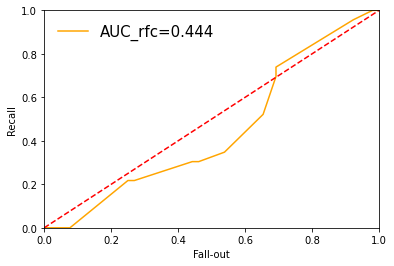

In [16]:
# 画图 画出模型的ROC曲线
plt.plot(false_positive_rate_rfc, recall_rfc, color='orange', label='AUC_rfc=%0.3f' % roc_auc_rfc)  
plt.legend(loc='best', fontsize=15, frameon=False)  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()

In [15]:
empty = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
n=1
while n < 51:
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = n)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    classifier = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.6, n_estimators=10,
                   random_state=420)
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)   
    y_updatapred = classifier.predict(X_train)
    from sklearn.metrics import confusion_matrix, roc_auc_score
    cm = confusion_matrix(Y_test, y_pred)   
    cm_updata = confusion_matrix(Y_train, y_updatapred)
    auc = roc_auc_score(Y_test, y_pred)
    auc_updata = roc_auc_score(Y_train, y_updatapred)
    a = cm[0,0]
    b = cm[0,1]
    c = cm[1,0]
    d = cm[1,1]
    sen = d/(d+c)
    sep = a/(a+b)
    acc = (a+d)/(a+b+c+d)
    pre = a/(a+c)
    F1 = (2*a)/(2*a+c+b)
    
    a_updata = cm_updata[0,0]
    b_updata = cm_updata[0,1]
    c_updata = cm_updata[1,0]
    d_updata = cm_updata[1,1]
    
    sen_updata = d_updata/(d_updata + c_updata)
    sep_updata = a_updata/(a_updata + b_updata)
    acc_updata = (a_updata+d_updata)/(a_updata+b_updata+c_updata+d_updata)
    pre_updata = a_updata/(a_updata + c_updata)
    F1_updata = (2*a_updata)/(2*a_updata+c_updata+b_updata)
    
    first = np.array([[n],[sen],[sep],[acc],[pre],[F1],[auc],[sen_updata],[sep_updata],[acc_updata],[pre_updata],[F1_updata],[auc_updata]])
    second = np.hstack((empty,first))
    empty = second
    n = n + 1
    print(n)
final_par = np.delete(second,0,axis=1)
print (final_par)
final_parT = final_par.T
np.savetxt('AdaBoostClassifier_Cocr',final_parT,delimiter=',')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
[[1.00000000e+00 2.00000000e+00 3.00000000e+00 4.00000000e+00
  5.00000000e+00 6.00000000e+00 7.00000000e+00 8.00000000e+00
  9.00000000e+00 1.00000000e+01 1.10000000e+01 1.20000000e+01
  1.30000000e+01 1.40000000e+01 1.50000000e+01 1.60000000e+01
  1.70000000e+01 1.80000000e+01 1.90000000e+01 2.00000000e+01
  2.10000000e+01 2.20000000e+01 2.30000000e+01 2.40000000e+01
  2.50000000e+01 2.60000000e+01 2.70000000e+01 2.80000000e+01
  2.90000000e+01 3.00000000e+01 3.10000000e+01 3.20000000e+01
  3.30000000e+01 3.40000000e+01 3.50000000e+01 3.60000000e+01
  3.70000000e+01 3.80000000e+01 3.90000000e+01 4.00000000e+01
  4.10000000e+01 4.20000000e+01 4.30000000e+01 4.40000000e+01
  4.50000000e+01 4.60000000e+01 4.70000000e+01 4.80000000e+01
  4.90000000e+01 5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.